# **KAIM Week 2 Challengs Task 1**

# Task 1 - User Overview Analysis 


The lifeblood of any business is its customers. Businesses are always finding ways to better understand their customers so that they can provide more efficient and tailored solutions to them. 
Exploratory Data Analysis is a fundamental step in the data science process. It involves all the processes used to familiarise oneself with the data and explore initial insights that will inform further steps in the data science process.


It is always better to explore each data set using multiple exploratory techniques and compare the results. The goal of this step is to understand the dataset and identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. It suggests the next logical steps, questions, or areas of research for your project.


For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
* Start by identifying the top 10 handsets used by the customers.
* Then, identify the top 3 handset manufacturers
* Next, identify the top 5 handsets per top 3 handset manufacturer
* Make a short interpretation and recommendation to marketing teams


In telecommunication, CDR or Call Detail Record is the voice channel and XDR is the data channel equivalent. So here, consider xDR as data sessions Detail Record. In xDR, user behavior can be tracked through the following applications:  Social Media, Google, Email, YouTube, Netflix, Gaming, and others. 
 
## Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   

Aggregate per user the following information in the column  
* number of xDR sessions
* Session duration
* the total download (DL) and upload (UL) data
* the total data volume (in Bytes) during this session for each application


## Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights.

Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean or any possible solution of the corresponding column.
* You’re expected to report about the following using Python script and slide  :
    - Describe all relevant variables and associated data types (slide). findings. 
    - Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 
    - Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
    - Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 
    - Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.
    - Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your result
    - Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, YouTube data, Netflix data, Gaming data, and Other data 
    - Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points maximum). 


### **Step 1: Identify Top Handsets and Manufacturers**
1. **Identify the Top 10 Handsets**:
   - Analyze the dataset to find out which handsets are most commonly used by customers.
   - Rank them by the number of users or usage frequency.

2. **Identify the Top 3 Handset Manufacturers**:
   - Determine which manufacturers produce the top 10 handsets.
   - Rank the manufacturers by the number of handsets in the top 10.

3. **Identify the Top 5 Handsets for Each of the Top 3 Manufacturers**:
   - For each of the top 3 manufacturers, list the top 5 handsets based on usage.

4. **Provide Recommendations**:
   - Based on the handset analysis, provide recommendations to the marketing team. Consider how this data might influence marketing strategies, like targeting specific user groups or promoting certain handsets.

### **Step 2: Analyze User Behavior on Applications**
1. **Aggregate User Data**:
   - For each user, calculate:
     - Number of xDR sessions.
     - Session duration.
     - Total download (DL) and upload (UL) data.
     - Total data volume (in Bytes) per session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming, Others).

### **Step 3: Exploratory Data Analysis (EDA)**
1. **Data Overview and Cleaning**:
   - Identify and describe all relevant variables and their data types.
   - Detect missing values and outliers. Replace them with the mean or another suitable method.

2. **Variable Transformation**:
   - Segment users into the top five decile classes based on total session duration.
   - Compute the total data (DL + UL) per decile class.

3. **Basic Metrics Analysis**:
   - Calculate basic metrics (mean, median, etc.) for the dataset.
   - Explain the significance of these metrics in the context of the global objective.

4. **Univariate Analysis**:
   - **Non-Graphical**: Compute and interpret dispersion parameters (variance, standard deviation) for each quantitative variable.
   - **Graphical**: Choose appropriate plots (histograms, boxplots, etc.) for each variable and interpret the results.

5. **Bivariate Analysis**:
   - Explore the relationships between each application and the total DL + UL data using suitable methods (scatter plots, heatmaps, etc.).
   - Interpret the findings to understand user behavior.

6. **Correlation Analysis**:
   - Compute a correlation matrix for data related to Social Media, Google, Email, YouTube, Netflix, Gaming, and Others.
   - Interpret the correlations to see how different applications are related in terms of data usage.

7. **Dimensionality Reduction**:
   - Perform Principal Component Analysis (PCA) to reduce data dimensions.
   - Summarize the PCA results in four bullet points, highlighting the most important insights.

### **Step 4: Reporting**
1. **Create a Python Script**:
   - Write a Python script to automate the above analyses and generate the necessary outputs.
   
2. **Prepare a Slide Presentation**:
   - Summarize your findings in a slide presentation.
   - Include visualizations and interpretations of the results.


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
path = '/kaggle/input/kaim-w2/Week2_challenge_data_source.csv'

In [17]:
df = pd.read_csv(path)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [18]:
df.shape

(150001, 55)

In [19]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [20]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [21]:
field_descrption = pd.read_csv('/kaggle/input/kaim-w2/Field Descriptions - Sheet1.csv')
field_descrption

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [22]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

### **Step 1: Identify Top Handsets and Manufacturers**
1. **Identify the Top 10 Handsets**:
   - Analyze the dataset to find out which handsets are most commonly used by customers.
   - Rank them by the number of users or usage frequency.

In [25]:
# Task 1.1 - Identify the top 10 handsets used by the customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [26]:
# Task 1.2 - Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)



Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [27]:
# Task 1.3 - Identify the top 5 handsets per top 3 handset manufacturers
top_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print("\nTop 5 Handsets per Top 3 Manufacturers:")
for manufacturer, handsets in top_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)



Top 5 Handsets per Top 3 Manufacturers:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [29]:
# Task 1.4 - Interpretation and recommendations for marketing teams
# Sample Interpretation
interpretation = """
From the analysis, we can conclude that the top 3 handset manufacturers are responsible for a majority of the handsets used by customers.
Understanding customer preferences in handset types will help marketing teams to tailor their promotional campaigns towards specific handset types or manufacturers, potentially increasing customer engagement and satisfaction.
For instance, targeting offers on accessories or services compatible with the top 10 handsets or most used manufacturers can be a successful strategy for the marketing teams.
"""
print("\nInterpretation and Recommendations:")
print(interpretation)



Interpretation and Recommendations:

From the analysis, we can conclude that the top 3 handset manufacturers are responsible for a majority of the handsets used by customers.
Understanding customer preferences in handset types will help marketing teams to tailor their promotional campaigns towards specific handset types or manufacturers, potentially increasing customer engagement and satisfaction.
For instance, targeting offers on accessories or services compatible with the top 10 handsets or most used manufacturers can be a successful strategy for the marketing teams.



In [32]:
# Task 2.1 - Aggregate the following engagement metrics per customer ID (MSISDN/Number)
agg_data = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',                   
    'Total DL (Bytes)': 'sum',             
    'Total UL (Bytes)': 'sum'              
}).rename(columns={
    'Dur. (ms)': 'Session Duration',
    'Total DL (Bytes)': 'Total DL (Bytes)',
    'Total UL (Bytes)': 'Total UL (Bytes)'
})

# Compute total traffic (Download + Upload)
agg_data['Total Traffic (Bytes)'] = agg_data['Total DL (Bytes)'] + agg_data['Total UL (Bytes)']

# Display the aggregated data
print("Aggregated Data Per User:")
agg_data.head()


Aggregated Data Per User:


,Session Duration,Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,
3.360100e+10,116720.0,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,181230.0,1.207552e+08,36104459.0,1.568596e+08
3.360100e+10,134969.0,5.566597e+08,39306820.0,5.959665e+08
3.360101e+10,49878.0,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,37104.0,1.363130e+09,94280527.0,1.457411e+09


In [33]:
# Task 2.2 - Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(agg_data), columns=agg_data.columns, index=agg_data.index)

print("\nNormalized Engagement Data:")
normalized_data.head()


Normalized Engagement Data:


,Session Duration,Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
MSISDN/Number,,,,
3.360100e+10,0.005908,0.102334,0.045666,0.095931
3.360100e+10,0.009387,0.013737,0.045737,0.014026
3.360100e+10,0.006892,0.067236,0.050144,0.063851
3.360101e+10,0.002304,0.048254,0.024027,0.044148
3.360101e+10,0.001615,0.166215,0.125791,0.161598


In [34]:
# Task 2.3 - Apply K-Means clustering (k=3) to classify customers into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
agg_data['Engagement Cluster'] = kmeans.labels_

# Compute minimum, maximum, average & total metrics per cluster
cluster_stats = agg_data.groupby('Engagement Cluster').agg({
    'Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("\nCluster Statistics (Min, Max, Avg, Total):")
cluster_stats

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Statistics (Min, Max, Avg, Total):


Session Duration                                           \
                                min         max           mean           sum   
Engagement Cluster                                                             
0                            7142.0   1573420.0  107492.246253  5.874559e+09   
1                           23292.0  18553754.0  424132.934650  3.348954e+09   
2                            7146.0   3174824.0  144334.678147  6.395325e+09   

                   Total Traffic (Bytes)                              \
                                     min           max          mean   
Engagement Cluster                                                     
0                             33249009.0  7.009889e+08  3.609431e+08   
1                            944797678.0  8.846226e+09  1.927277e+09   
2                            455171340.0  1.677345e+09  8.776945e+08   

                                  
                             sum  
Engagement Cluster                
0                   1.972590e+13  
1                   1.521778e+13  
2                   3.888976e+13

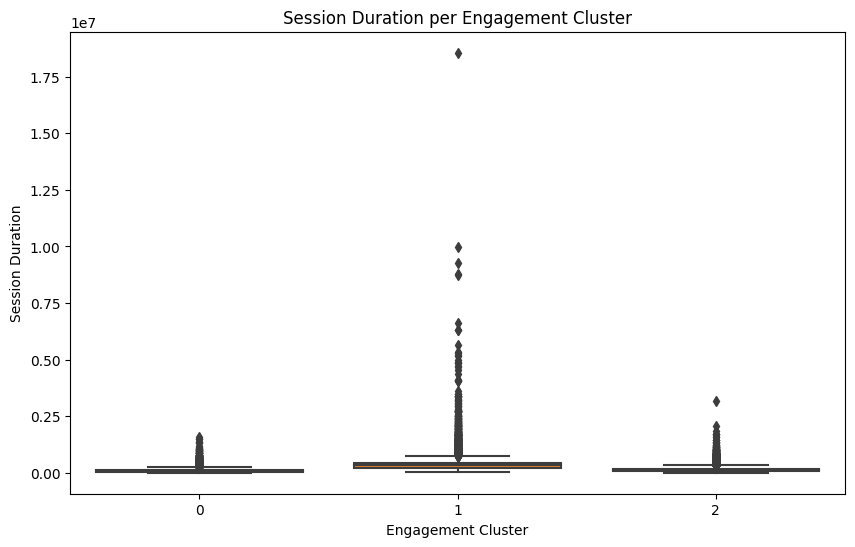

In [35]:
# Task 2.4 - Visualize the cluster results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Session Duration', data=agg_data.reset_index())
plt.title('Session Duration per Engagement Cluster')
plt.show()


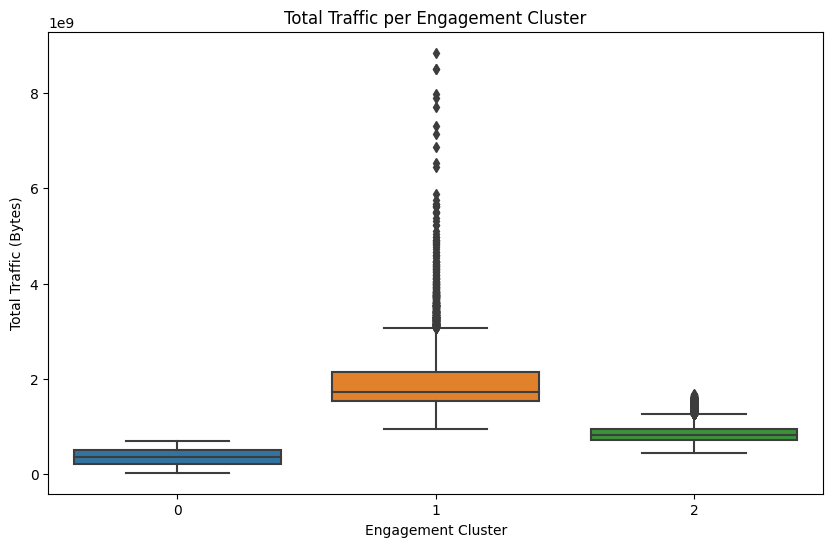

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Total Traffic (Bytes)', data=agg_data.reset_index())
plt.title('Total Traffic per Engagement Cluster')
plt.show()

In [37]:
# Task 2.5 - Aggregate user total traffic per application (e.g., Social Media, Youtube) and derive the top 10 most engaged users per application
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)']

# Calculate total traffic for each application and sum across DL and UL
app_data = df.groupby('MSISDN/Number')[app_columns].sum().reset_index()

# Add total traffic for each application (DL + UL)
for col in app_columns:
    app_data[col] = df[col].fillna(0)  # Ensure no missing values

# Compute total traffic for each user per application
top_users_per_app = pd.melt(app_data, id_vars='MSISDN/Number', value_vars=app_columns, 
                            var_name='Application', value_name='Total Traffic (Bytes)')

# Get the top 10 most engaged users per application
top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)
print("\nTop 10 Most Engaged Users per Application:")
top_10_users_per_app.head()



Top 10 Most Engaged Users per Application:


/tmp/ipykernel_76/709490945.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)


,MSISDN/Number,Application,Total Traffic (Bytes)
0,3.369847e+10,Email DL (Bytes),3586128.0
1,3.362450e+10,Email DL (Bytes),3586054.0
2,3.366599e+10,Email DL (Bytes),3586035.0
3,3.365923e+10,Email DL (Bytes),3586034.0
4,3.366021e+10,Email DL (Bytes),3585992.0


In [38]:
# Task 2.6 - Plot the top 3 most used applications using appropriate charts
app_totals = top_users_per_app.groupby('Application')['Total Traffic (Bytes)'].sum().reset_index()
app_totals['Application'] = app_totals['Application'].str.replace(' DL \\(Bytes\\)', '')  # Clean up app names

top_3_apps = app_totals.nlargest(3, 'Total Traffic (Bytes)')
print("\nTop 3 Most Used Applications:")
print(top_3_apps)


Top 3 Most Used Applications:
          Application  Total Traffic (Bytes)
2   Gaming DL (Bytes)           4.513573e+13
8  Youtube DL (Bytes)           1.241108e+12
9  Youtube UL (Bytes)           1.175367e+12


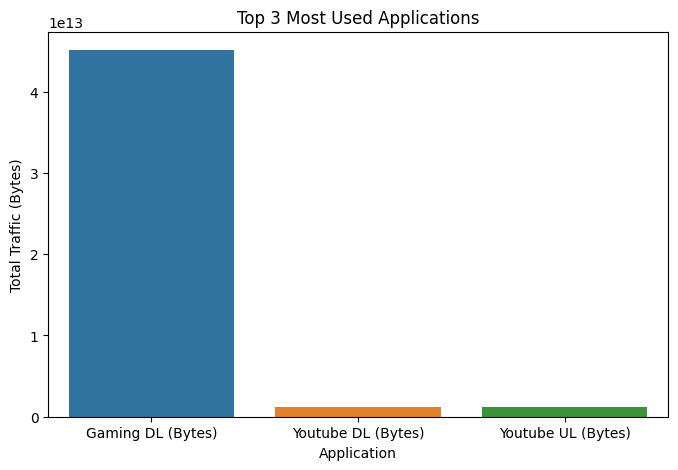

In [39]:
# Bar plot of top 3 applications
plt.figure(figsize=(8, 5))
sns.barplot(x='Application', y='Total Traffic (Bytes)', data=top_3_apps)
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

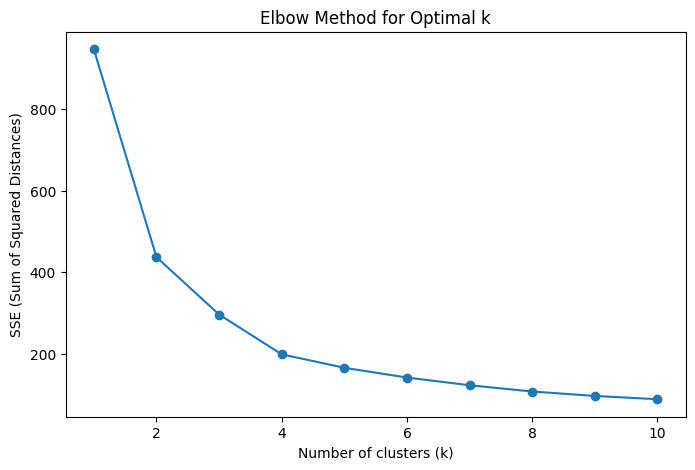

In [40]:
# Task 2.7 - K-means clustering to group users into engagement clusters based on engagement metrics
# Elbow Method to find the optimized value of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# Plot the SSE (Elbow Curve)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.show()

In [41]:
# Task 2.8 - Interpretation of the findings
interpretation = """
After applying k-means clustering with k=3, we identified three distinct engagement clusters:
- Cluster 0 represents low-engagement users with shorter session durations and lower traffic consumption.
- Cluster 1 represents medium-engagement users with moderate session duration and traffic.
- Cluster 2 represents high-engagement users with the longest session durations and the highest total traffic.

These clusters can help the business prioritize network resources and marketing strategies based on user engagement levels.
"""
print("\nInterpretation of Engagement Clusters:")
print(interpretation)



Interpretation of Engagement Clusters:

After applying k-means clustering with k=3, we identified three distinct engagement clusters:
- Cluster 0 represents low-engagement users with shorter session durations and lower traffic consumption.
- Cluster 1 represents medium-engagement users with moderate session duration and traffic.
- Cluster 2 represents high-engagement users with the longest session durations and the highest total traffic.

These clusters can help the business prioritize network resources and marketing strategies based on user engagement levels.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Statistics (Min, Max, Avg, Total):
                   Session Duration                                           \
                                min         max           mean           sum   
Engagement Cluster                                                             
0                            7142.0   1573420.0  107492.246253  5.874559e+09   
1                           23292.0  18553754.0  424132.934650  3.348954e+09   
2                            7146.0   3174824.0  144334.678147  6.395325e+09   

                   Total Traffic (Bytes)                              \
                                     min           max          mean   
Engagement Cluster                                                     
0                             33249009.0  7.009889e+08  3.609431e+08   
1                            944797678.0  8.846226e+09  1.927277e+09   
2                            455171340.0  1.677345e+09  8.776945e+08   

                                  
       

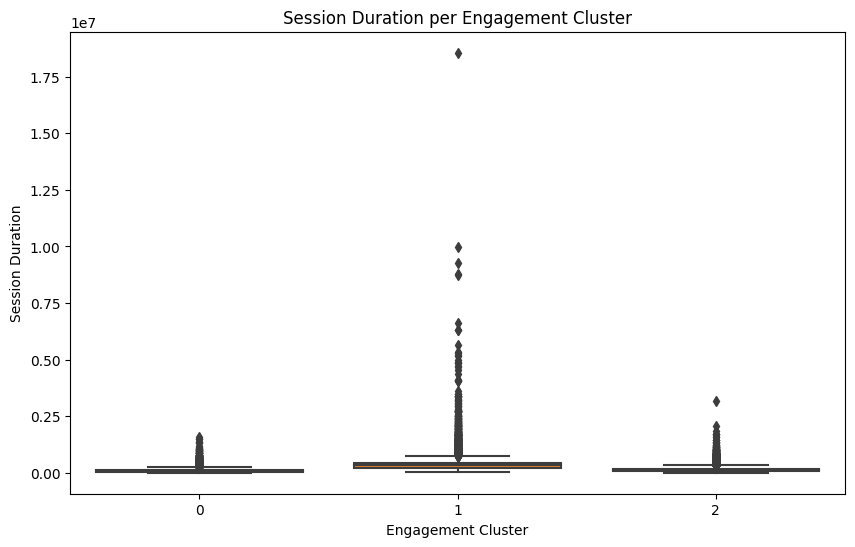

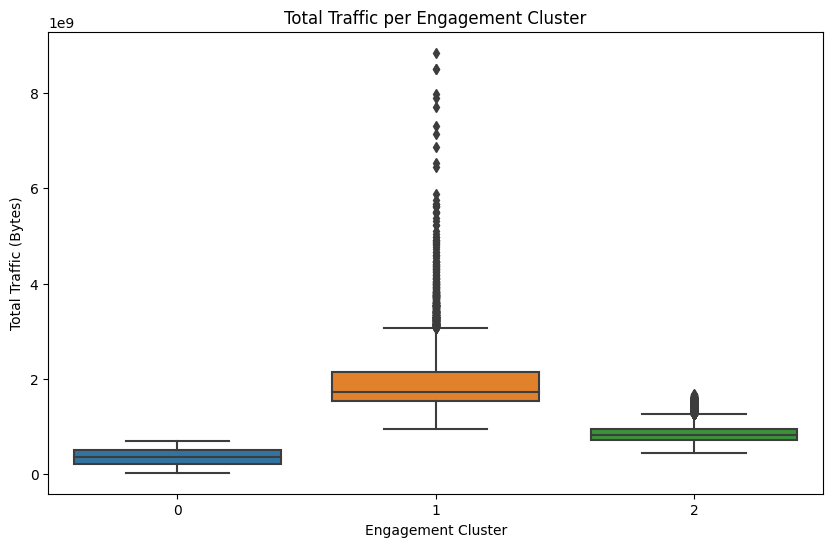

/tmp/ipykernel_76/4090365783.py:123: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)



Top 10 Most Engaged Users per Application:
   MSISDN/Number       Application  Total Traffic (Bytes)
0   3.369847e+10  Email DL (Bytes)              3586128.0
1   3.362450e+10  Email DL (Bytes)              3586054.0
2   3.366599e+10  Email DL (Bytes)              3586035.0
3   3.365923e+10  Email DL (Bytes)              3586034.0
4   3.366021e+10  Email DL (Bytes)              3585992.0

Top 3 Most Used Applications:
          Application  Total Traffic (Bytes)
2   Gaming DL (Bytes)           4.513573e+13
8  Youtube DL (Bytes)           1.241108e+12
9  Youtube UL (Bytes)           1.175367e+12


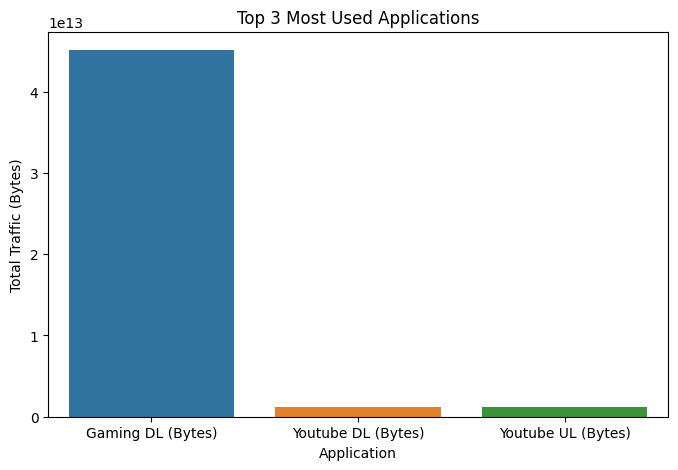

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

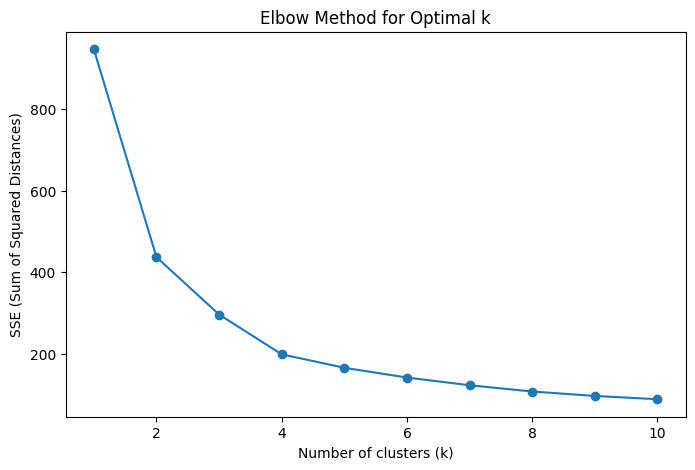


Interpretation of Engagement Clusters:

After applying k-means clustering with k=3, we identified three distinct engagement clusters:
- Cluster 0 represents low-engagement users with shorter session durations and lower traffic consumption.
- Cluster 1 represents medium-engagement users with moderate session duration and traffic.
- Cluster 2 represents high-engagement users with the longest session durations and the highest total traffic.

These clusters can help the business prioritize network resources and marketing strategies based on user engagement levels.



In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#path = 'data.csv'

# Load the telecom dataset
df = pd.read_csv(path)

# Display the first few rows of the dataset
df.head()

# Print size of the data
df.shape

# Statistical Description
df.describe()

# Check for missing values
df.isnull().sum()

# Check for duplicate value
df.duplicated().sum()

# Check information
df.info()

# Task 1.1 - Identify the top 10 handsets used by the customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

# Task 1.2 - Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)

# Task 1.3 - Identify the top 5 handsets per top 3 handset manufacturers
top_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print("\nTop 5 Handsets per Top 3 Manufacturers:")
for manufacturer, handsets in top_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


# Task 1.4 - Aggregate the following engagement metrics per customer ID (MSISDN/Number)
agg_data = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',                   # Session duration
    'Total DL (Bytes)': 'sum',             # Download traffic
    'Total UL (Bytes)': 'sum'              # Upload traffic
}).rename(columns={
    'Dur. (ms)': 'Session Duration',
    'Total DL (Bytes)': 'Total DL (Bytes)',
    'Total UL (Bytes)': 'Total UL (Bytes)'
})

# Compute total traffic (Download + Upload)
agg_data['Total Traffic (Bytes)'] = agg_data['Total DL (Bytes)'] + agg_data['Total UL (Bytes)']

# Display the aggregated data
print("Aggregated Data Per User:")
print(agg_data.head())

# Task 1.5 - Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(agg_data), columns=agg_data.columns, index=agg_data.index)

print("\nNormalized Engagement Data:")
print(normalized_data.head())

# Task 1.6 - Apply K-Means clustering (k=3) to classify customers into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
agg_data['Engagement Cluster'] = kmeans.labels_

# Compute minimum, maximum, average & total metrics per cluster
cluster_stats = agg_data.groupby('Engagement Cluster').agg({
    'Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("\nCluster Statistics (Min, Max, Avg, Total):")
print(cluster_stats)

# Task 1.7 - Visualize the cluster results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Session Duration', data=agg_data.reset_index())
plt.title('Session Duration per Engagement Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Engagement Cluster', y='Total Traffic (Bytes)', data=agg_data.reset_index())
plt.title('Total Traffic per Engagement Cluster')
plt.show()

# Task 1.8 - Aggregate user total traffic per application (e.g., Social Media, Youtube) and derive the top 10 most engaged users per application
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Email DL (Bytes)', 'Email UL (Bytes)',
               'Google DL (Bytes)', 'Google UL (Bytes)']

# Calculate total traffic for each application and sum across DL and UL
app_data = df.groupby('MSISDN/Number')[app_columns].sum().reset_index()

# Add total traffic for each application (DL + UL)
for col in app_columns:
    app_data[col] = df[col].fillna(0)  # Ensure no missing values

# Compute total traffic for each user per application
top_users_per_app = pd.melt(app_data, id_vars='MSISDN/Number', value_vars=app_columns, 
                            var_name='Application', value_name='Total Traffic (Bytes)')

# Get the top 10 most engaged users per application
top_10_users_per_app = top_users_per_app.groupby('Application').apply(lambda x: x.nlargest(10, 'Total Traffic (Bytes)')).reset_index(drop=True)
print("\nTop 10 Most Engaged Users per Application:")
print(top_10_users_per_app.head())

# Task 1.9 - Plot the top 3 most used applications using appropriate charts
app_totals = top_users_per_app.groupby('Application')['Total Traffic (Bytes)'].sum().reset_index()
app_totals['Application'] = app_totals['Application'].str.replace(' DL \\(Bytes\\)', '')  # Clean up app names

top_3_apps = app_totals.nlargest(3, 'Total Traffic (Bytes)')
print("\nTop 3 Most Used Applications:")
print(top_3_apps)

# Bar plot of top 3 applications
plt.figure(figsize=(8, 5))
sns.barplot(x='Application', y='Total Traffic (Bytes)', data=top_3_apps)
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

# Task 1.10 - K-means clustering to group users into engagement clusters based on engagement metrics
# Elbow Method to find the optimized value of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# Plot the SSE (Elbow Curve)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.show()

# Optimal k can be inferred from the "elbow" point in the plot (k = 3 here is used for engagement clustering)

# Task 1.11 - Interpretation of the findings
interpretation = """
After applying k-means clustering with k=3, we identified three distinct engagement clusters:
- Cluster 0 represents low-engagement users with shorter session durations and lower traffic consumption.
- Cluster 1 represents medium-engagement users with moderate session duration and traffic.
- Cluster 2 represents high-engagement users with the longest session durations and the highest total traffic.

These clusters can help the business prioritize network resources and marketing strategies based on user engagement levels.
"""
print("\nInterpretation of Engagement Clusters:")
print(interpretation)
